# CA1 Assignment
## Analysis of Data in Singapore's Health Sector Using Python
### Module: EP0302 Programming for Data Science
### Name: Ang Teong-Hean Isaac
### Admin Number: P2021487
**URLs of Datasets**
<br>
Government Expenditure: https://data.gov.sg/dataset/government-health-expenditure?view_id=8576310e-8d3f-42c0-9cf9-7b0c5fa55449&resource_id=cf7b1696-9b0e-425d-a96a-e61c41629623
<br>
Medifund: https://data.gov.sg/dataset/medifund
<br>
Dengue and DHF: 
https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases


# Importing required dependancies 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#setting figuresize for easier inline viewing
plt.rcParams['figure.figsize'] = [20, 15]


# Functions (Numpy)
Functions created using numpy to provide qualitative and quantitative summary of datasets

In [26]:
def quanSummary(data):
    # takes a numpy array and returns a quantitative summary

    print(f"{'Number of Entries:':<35} {np.count_nonzero(data):>20} \n{'Lowest Value:':<35} {data.min():>20} \n{'Highest Value:':<35} {data.max():>20} \n{'Mean:':<35} {data.mean():>20.2f} \n{'Standard Deviation (SD):':<35} {data.std():>20.2f} \n{'Variance:':<35} {data.var():>20.2f}")
    print()


def qualSummary(data):
    # takes a numpy array and retrns qualitative summary

    # calculate most frequent value in the case of string values
    unique, pos = np.unique(data, return_inverse=True)
    counts = np.bincount(pos)
    maxpos = counts.argmax()

    print(f"{'Number of Entries:':<35} {np.count_nonzero(data):>20} \n{'Number of Unique Entries:':<35} {len(np.unique(data)):>20} \n{'Unique Entries:':<35} \n{unique} \n{'Most Frequent Entry:':<35} {unique[maxpos]:>20} \n{'Frequency of Most Frequent Entry:':<35} {counts[maxpos]:>20}")
    print()

# Parsing in Data From CSV Files
Here we will parse in the data from our datasets stored in CSV files under ./data

In [27]:
govt_exp = np.genfromtxt("./data/government-health-expenditure.csv", dtype=["U50", "i8", "i8", "f8", "f8"], delimiter=",", names=True)
medifund = np.genfromtxt("./data/medifund-applications-and-grants-disbursed-annual.csv", dtype=["U50", "i8", "f8"], delimiter=",", names=True)
dengue = np.genfromtxt("./data/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases.csv", dtype=["U50", "i8", "U50", "i8"], delimiter=",", names=True)



# Analysing Government Expenditure Dataset 
**URL:** https://data.gov.sg/dataset/government-health-expenditure?view_id=8576310e-8d3f-42c0-9cf9-7b0c5fa55449&resource_id=cf7b1696-9b0e-425d-a96a-e61c41629623
<br>
<br>
In this dataset, I wanted to find out the rate of increase in funds spent on the healthcare sector, and the if more funds are allocated to development or operating expenditures each year.

## Summary of Data Using Numpy
As we can see here, there is quite a variation in the money spent on healthcare when measured in millions. In the next section, we will get more insights from a bar chart and line graph.

In [28]:
# Summary of data using Numpy
print("Government Expenditure Dataset")
print(govt_exp.dtype.names)
print(govt_exp[:3])
print()

# Summary of Financial Year column
print("Summary of column Financial_Year")
qualSummary(govt_exp["financial_year"])

# Summary of Developemnt Expenditure column
print("Summary of column Development Expenditure")
quanSummary(govt_exp["development_expenditure"])

# Summary of Operating Expenditure column
print("Summary of column Operating Expenditure")
quanSummary(govt_exp["operating_expenditure"])

# Summary of Total Expenditure column
print("Summary of column Government_Health_Expenditure (In $ Million)")
quanSummary(govt_exp["government_health_expenditure"])

# Summary of Percentage GDP column
print("Summary of column Percentage_GDP (In %)")
quanSummary(govt_exp["percentage_gdp"])
print()

Government Expenditure Dataset
('financial_year', 'operating_expenditure', 'development_expenditure', 'government_health_expenditure', 'percentage_gdp')
[('2006', 1840,  96, 2009.7, 0.9) ('2007', 2019, 185, 2283.2, 0.8)
 ('2008', 2379, 336, 2814.1, 1. )]

Summary of column Financial_Year
Number of Entries:                                    13 
Number of Unique Entries:                             13 
Unique Entries:                     
['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018'] 
Most Frequent Entry:                                2006 
Frequency of Most Frequent Entry:                      1

Summary of column Development Expenditure
Number of Entries:                                    13 
Lowest Value:                                         96 
Highest Value:                                      1618 
Mean:                                             825.15 
Standard Deviation (SD):                          514.11 
Variance:      

## Visualisation of Data Using MatplotLib
From the bar chart, we can see that the expenditure on healthcare in general increases at an exponential rate over the years, with a large difference from 2006 and 2018. We can also see that in the first few years, there was not much increase in development expenditure, but in the later years, development expenditure increases much more. 
<br>
<br>
From the line graph, we see a decrease in percentage of GDP spent from 2006-2007, and increase form 2007-2009. It then decreases and plateaus from 2009-2012, and finally we see a large increase from 2012-2018. From this graph, we can speculate that the times where there were increases in % of GDP spent could have been due to the upgrading of facilities or building new facilities, as there is also an increase in development expenditure from the bar chart during those periods.  

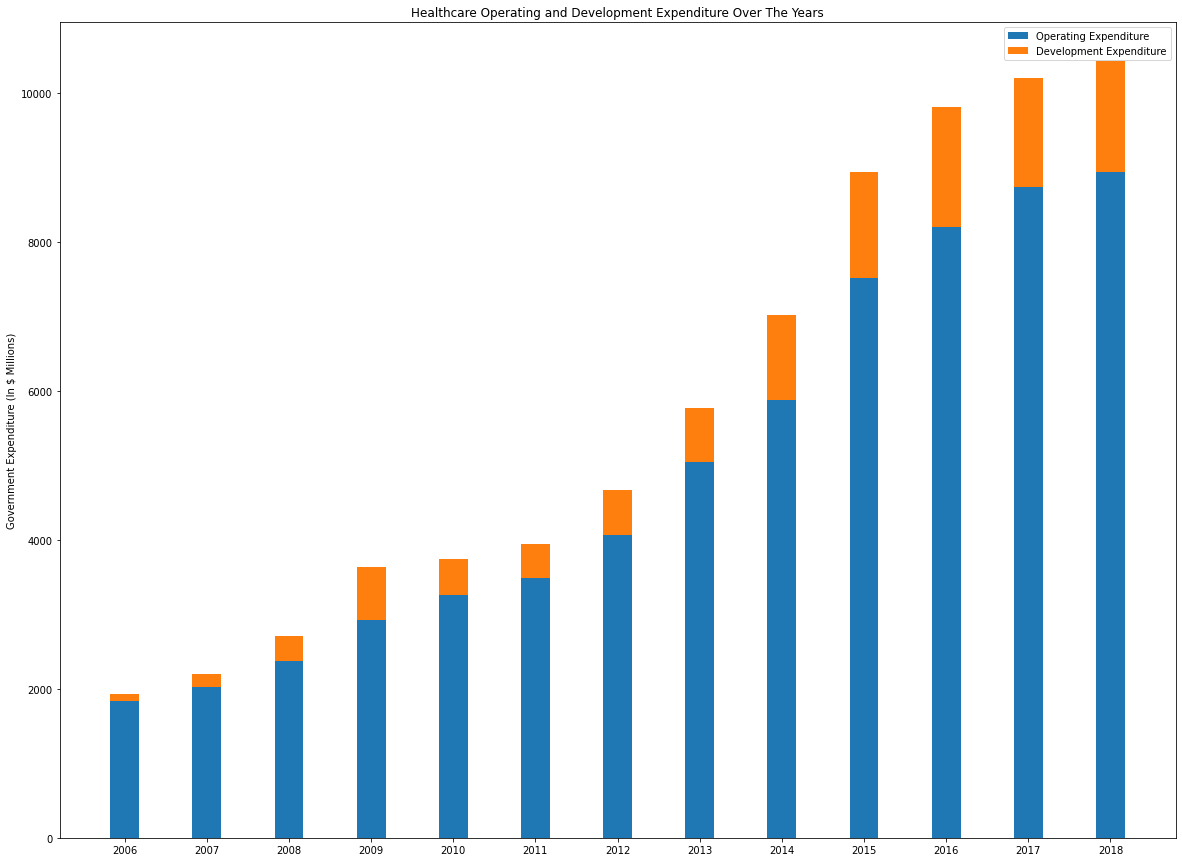

In [29]:
# Visual representation of data using matplotlib
# Bar Chart of Dollars (In Millions) Spent on Healthcare
labels = govt_exp["financial_year"]
operating_expenditure = govt_exp["operating_expenditure"]
development_expenditure = govt_exp["development_expenditure"]

width = 0.35
fig, ax = plt.subplots()

ax.bar(labels, operating_expenditure, width, label='Operating Expenditure')
ax.bar(labels, development_expenditure, width,
       bottom=operating_expenditure, label='Development Expenditure')

ax.set_ylabel('Government Expenditure (In $ Millions)')
ax.set_title('Healthcare Operating and Development Expenditure Over The Years')
ax.legend()
plt.savefig("./plots/govt_expenditure.png")




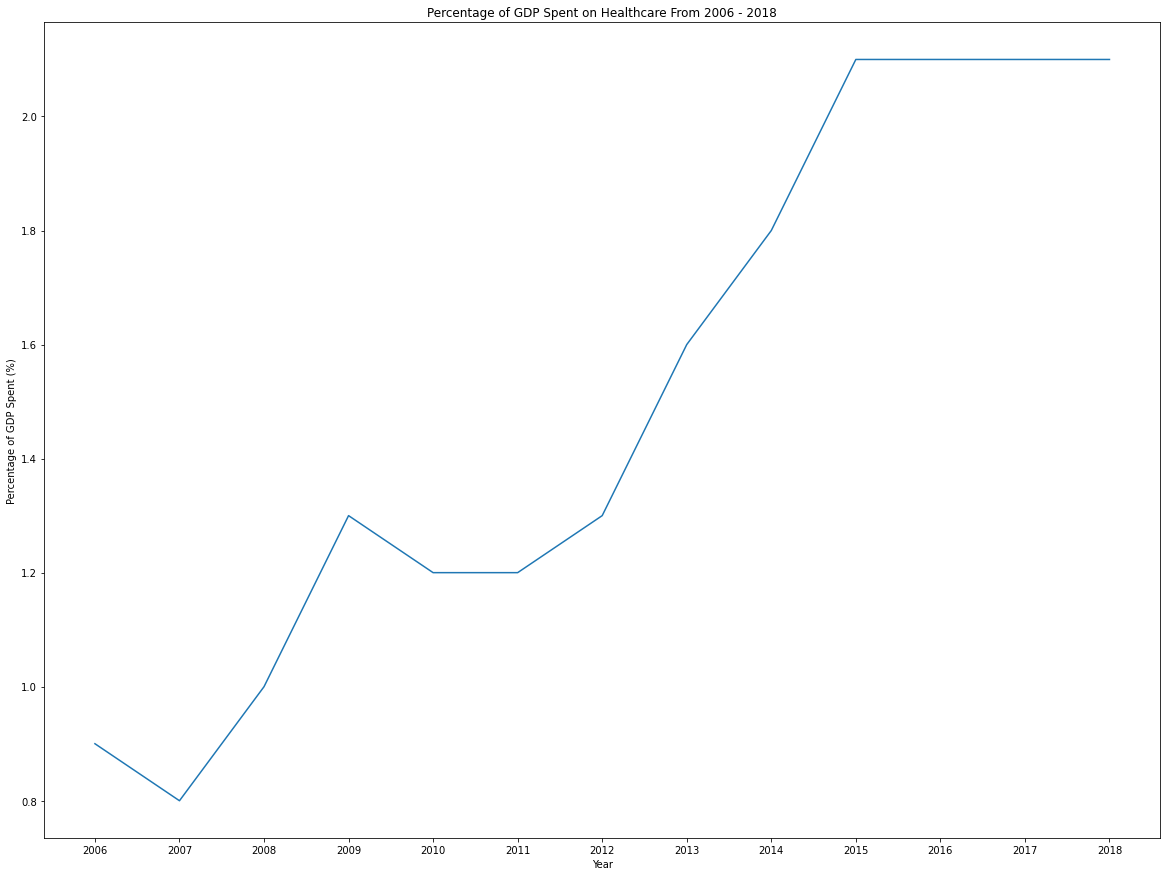

In [30]:
# Line Graph of Yearly % GDP on Healthcare
plt.plot(govt_exp["financial_year"], govt_exp["percentage_gdp"])
plt.title('Percentage of GDP Spent on Healthcare From 2006 - 2018')
plt.xlabel('Year')
plt.ylabel('Percentage of GDP Spent (%)')

plt.savefig("./plots/govt_expenditure1.png")

# Analysing Medifund Dataset 
**URL:** https://data.gov.sg/dataset/medifund
<br>
<br>

In this dataset, I wanted to find out if the increase in approved applications had a great impact on the value of grants disbursed. 

## Summary of Data Using Numpy
From the summary, we can see that the variation of applications approved is high, but not as high as compared to the value of grants disbursed.

In [31]:
# Summary of data using Numpy
print("Medifund Applications Dataset")
print(medifund.dtype.names)
print(medifund[:3])
print()

# Summary of Financial Year column
print("Summary of column Financial_Year")
qualSummary(["financial_year"])

# Summary of Applications Approved column
print("Summary of column Applications Approved")
quanSummary(medifund["applications_approved"])

# Summary of Grants Disbursed column
print("Summary of column Grants Disbursed (In $ Million)")
quanSummary(medifund["grants_disbursed"])

Medifund Applications Dataset
('financial_year', 'applications_approved', 'grants_disbursed')
[('2006', 301000, 39.6) ('2007', 357000, 49.5) ('2008', 370000, 59. )]

Summary of column Financial_Year
Number of Entries:                                     1 
Number of Unique Entries:                              1 
Unique Entries:                     
['financial_year'] 
Most Frequent Entry:                      financial_year 
Frequency of Most Frequent Entry:                      1

Summary of column Applications Approved
Number of Entries:                                    14 
Lowest Value:                                     301000 
Highest Value:                                   1240000 
Mean:                                          761785.71 
Standard Deviation (SD):                       352968.27 
Variance:                                124586596938.78

Summary of column Grants Disbursed (In $ Million)
Number of Entries:                                    14 
Lowest Value:   

## Visualisation of Data Using MatplotLib
We can tell here, that generally, as the years go by, the number of applications approved and value in grants disbursed both increase, while there is one outlier, 2007, where the increase is great and shortly decreases the following year. 
<br>
From the Scatterplot, we can see that during the early years, 2006-2012, the increase in approved applications does translate to a greater value of grants disbursed. However, in the later years, 2015-2019, that is not the case, and there are even cases when there is an incrase of applications but decrease in value of grants disbursed. 
<br>
As such, we can conclude that the increase in approved applications does not necessarily translate to an increase in value of grants disbursed.

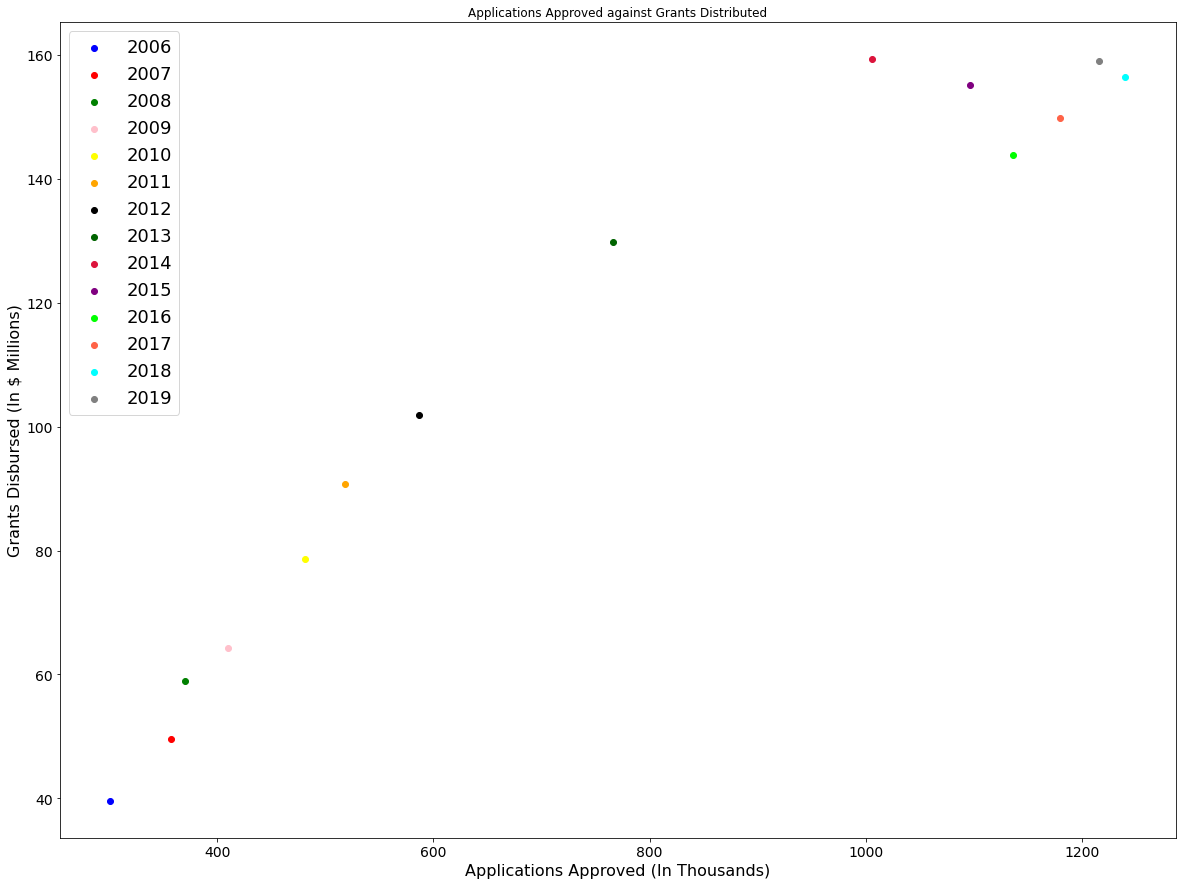

In [32]:
# Visual representation of data using matplotlib


fig, ax = plt.subplots(1, 1)
for year, applications, grants, c, in zip(medifund["financial_year"], medifund["applications_approved"], medifund["grants_disbursed"], ["blue", "red", "green", "pink", "yellow", "orange", "black", "darkgreen", "crimson", "purple", "lime", "tomato", "cyan", "gray"]):
    ax.scatter(applications/1000, grants, label=year, c=c)

ax.tick_params(labelsize=14)
ax.set_xlabel("Applications Approved (In Thousands)", fontsize=16)
ax.set_ylabel("Grants Disbursed (In $ Millions)", fontsize=16)
ax.set_title("Applications Approved against Grants Distributed")
ax.legend(prop={'size': 18}, frameon=True).get_frame().set_facecolor('white')

plt.savefig("./plots/medifund.png")

# Analysing Dengue/DHF Cases Dataset 
**URL:** https://data.gov.sg/dataset/weekly-number-of-dengue-and-dengue-haemorrhagic-fever-cases
<br>
<br>
In this dataset, I wanted to find out if the number of cases of dengue and DHF per week each year increases or decreases over time. I also wanted to find out the frequency of number of cases per week in each year to determine if that year has a generally high or low number of casees per week.


## Grouping of Data by Year

First, I group the dataset by year using dengue_year objects. The object contains properties which help with grouping and analysis later on, such as dengue and dhf cases for each year and their respective total numbers. I used a dictionary to store each dengue_year object to make it easy to reference later on when plotting our boxplot and histogram. 

In [33]:
# grouping data by year

# class to organise data in each year
class Dengue_year:
    def __init__(self, year, cases_dengue, cases_dhf):
        self.year = year
        self.cases_dengue = cases_dengue
        self.cases_dhf = cases_dhf
        self.total_dengue = sum(cases_dengue)
        self.total_dhf = sum(cases_dhf)


# list to store year objects
dengue_grouped = {}

# for loop purposes
current_year = "2014"
temp_cases_dengue = []
temp_cases_dhf = []
temp_dengue_all = []
temp_dhf_all = []

# loop to group data by year and parse into a year object
for year, type, cases in zip(dengue["year"], dengue["type_dengue"], dengue["number"]):
    if year == current_year:
        if type == "Dengue":
            temp_cases_dengue.append(cases)
            temp_dengue_all.append(cases)
        else:
            temp_cases_dhf.append(cases)
            temp_dhf_all.append(cases)
    else:
        # remove last week of entries for each year as year the last week of each year has no data for the number of cases
        temp_cases_dengue.pop()
        temp_cases_dhf.pop()
        temp_dengue_all.pop()
        temp_dhf_all.pop()

        # convert lists into numpy arrays and parse data for each year into a year object and add it to the dengue_grouped list
        dengue_grouped[current_year] = Dengue_year(
            current_year, np.array(temp_cases_dengue), np.array(temp_cases_dhf))

        # reset lists used for loop
        temp_cases_dengue = []
        temp_cases_dhf = []

        if type == "Dengue":
            temp_cases_dengue.append(cases)
            temp_dengue_all.append(cases)
        else:
            temp_cases_dhf.append(cases)
            temp_dhf_all.append(cases)
        current_year = year
else:
    # for the last case in the loop
    temp_cases_dengue.pop()
    temp_cases_dhf.pop()
    temp_dengue_all.pop()
    temp_dhf_all.pop()
    dengue_grouped[current_year] = Dengue_year(
        current_year, np.array(temp_cases_dengue), np.array(temp_cases_dhf))

    # once more for all the years combined
    dengue_grouped["all"] = Dengue_year(
        current_year, np.array(temp_dengue_all), np.array(temp_dhf_all))




# now we have a dictionary of data in each year that we can access by using dengue_grouped["year"] where "year" = year

## Summary of Data Using Numpy
From the summary, grouping makes it much easier to analyse the change in cases per year. We can see that the cases generally drop each year. In the next section, we will use a boxplot to see a more accurate picture of the situation. 

In [34]:
# Summary of data using Numpy
print("Dengue Cases Dataset")
print()

for key in dengue_grouped.keys():
    # Summary of dengue column
    print(f"Summary of Dengue Cases for {key}")
    qualSummary(dengue_grouped[key].cases_dengue)
    print(
        f"{'Total Dengue Cases:':<35} {dengue_grouped[key].total_dengue:>20}")
    print("\n" * 2)

    # Summary of dhf column
    print(f"Summary of DHF Cases for {key}")
    qualSummary(dengue_grouped[key].cases_dhf)
    print(
        f"{'Total DHF Cases:':<35} {dengue_grouped[key].total_dengue:>20}")
    print("\n" * 2)

Dengue Cases Dataset

Summary of Dengue Cases for 2014
Number of Entries:                                    52 
Number of Unique Entries:                             50 
Unique Entries:                     
[149 158 162 168 177 186 188 193 198 209 210 212 213 224 225 234 235 240
 244 251 261 273 278 282 291 297 336 339 344 362 367 369 396 401 418 427
 436 438 456 458 479 484 506 545 550 633 671 744 818 888] 
Most Frequent Entry:                                 186 
Frequency of Most Frequent Entry:                      2

Total Dengue Cases:                                18148



Summary of DHF Cases for 2014
Number of Entries:                                    17 
Number of Unique Entries:                              4 
Unique Entries:                     
[0 1 2 3] 
Most Frequent Entry:                                   0 
Frequency of Most Frequent Entry:                     35

Total DHF Cases:                                   18148



Summary of Dengue Cases for 2015
Number o

## Visualisation of Data Using MatplotLib
<br>
<br>
From the boxplot, we are able to not only see the trend across the years for dengue and dhf cases per week using the median in each year, but also see the outliers in each year. From here, we can conclude that the cases per week for dengue decreases a lot from 2014-2018, signalling that there is a positive change happening. As for DHF, there is no large change across the years, but as the number is low to begin with from 2014, that is expected. Most exceptional is 2015, where there were generally no cases at all, except for a few outliers, where there were a few weeks with some cases. 
<br>
<br>
From the histogram, we can see that in the early years from 2014-2016, most of the weeks had cases in the low hundreds. However, we can see that the situation greatly improved from 2017-2018, where most weeks, there were under 100 cases per week. As such, we can conclude that there has been a positive impact on the dengue situation in recent years.

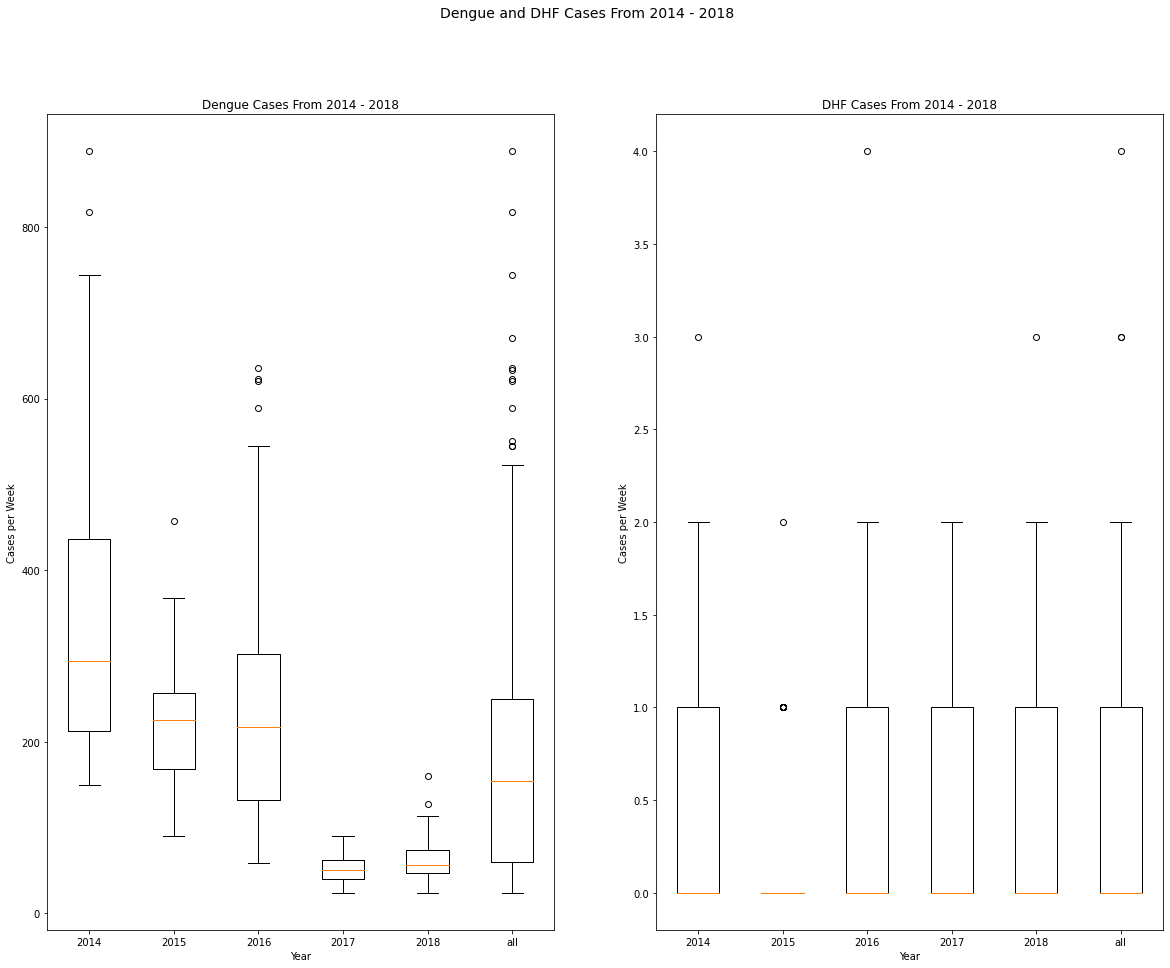

In [35]:


# matplotlib will give a warning if we do not specify the locations of ticks on the x axis as we set custom tick labels. Hence, I remove the warnings here. This is only for visual purposes as the line of warning prevents us from seeing the diagram in full size. 
# removing it will not affect any functionality of the code. 

import warnings
warnings.filterwarnings("ignore")

# Visual representation of dengue cases using matplotlib
data_dengue = [dengue_grouped["2014"].cases_dengue, dengue_grouped["2015"].cases_dengue, dengue_grouped["2016"].cases_dengue,
               dengue_grouped["2017"].cases_dengue, dengue_grouped["2018"].cases_dengue, dengue_grouped["all"].cases_dengue]

data_dhf = [dengue_grouped["2014"].cases_dhf, dengue_grouped["2015"].cases_dhf, dengue_grouped["2016"].cases_dhf,
            dengue_grouped["2017"].cases_dhf, dengue_grouped["2018"].cases_dhf, dengue_grouped["all"].cases_dhf]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Dengue and DHF Cases From 2014 - 2018', fontsize=14)

# boxplot for dengue cases
ax1.set_xticklabels(dengue_grouped.keys())
ax1.set(title="Dengue Cases From 2014 - 2018",
        xlabel="Year", ylabel="Cases per Week")
ax1.boxplot(data_dengue)

# boxplot for dhf cases
ax2.set_xticklabels(dengue_grouped.keys())
ax2.set(title="DHF Cases From 2014 - 2018",
        xlabel="Year", ylabel="Cases per Week")
ax2.boxplot(data_dhf)

plt.savefig("./plots/dengue.png")

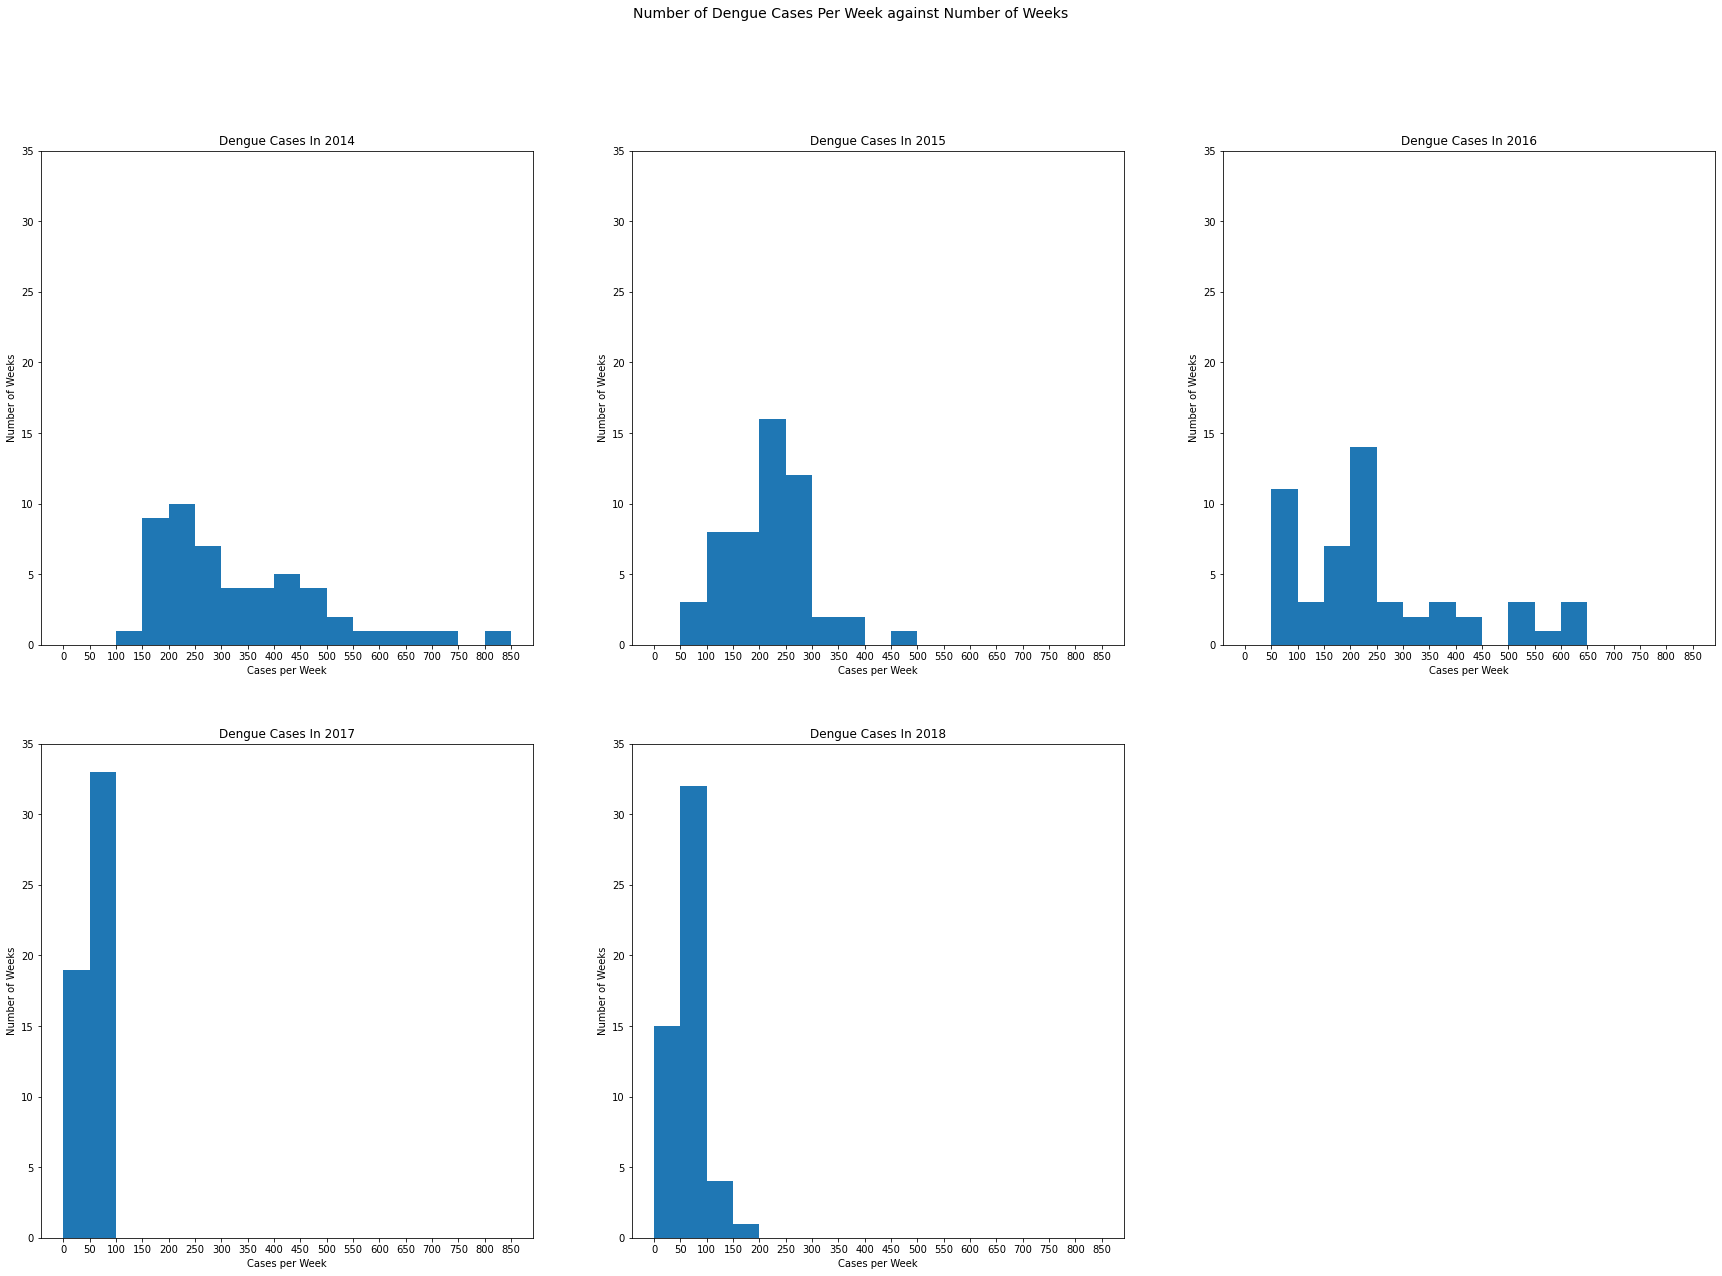

In [36]:
# histogram of dengue cases

dengue_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]

fig, ax = plt.subplots(2, 3, figsize=(30,20))
ax[0, 0].hist(dengue_grouped["2014"].cases_dengue, bins=dengue_bins)
ax[0, 0].set_xticks(dengue_bins)
ax[0, 0].yaxis.set_ticks(np.arange(0, 40, 5))
ax[0, 0].set(title="Dengue Cases In 2014",
             xlabel="Cases per Week", ylabel="Number of Weeks")

ax[0, 1].hist(dengue_grouped["2015"].cases_dengue, bins=dengue_bins)
ax[0, 1].set_xticks(dengue_bins)
ax[0, 1].yaxis.set_ticks(np.arange(0, 40, 5))
ax[0, 1].set(title="Dengue Cases In 2015",
             xlabel="Cases per Week", ylabel="Number of Weeks")

ax[0, 2].hist(dengue_grouped["2016"].cases_dengue, bins=dengue_bins)
ax[0, 2].set_xticks(dengue_bins)
ax[0, 2].yaxis.set_ticks(np.arange(0, 40, 5))
ax[0, 2].set(title="Dengue Cases In 2016",
             xlabel="Cases per Week", ylabel="Number of Weeks")


ax[1, 0].hist(dengue_grouped["2017"].cases_dengue, bins=dengue_bins)
ax[1, 0].set_xticks(dengue_bins)
ax[1, 0].yaxis.set_ticks(np.arange(0, 40, 5))
ax[1, 0].set(title="Dengue Cases In 2017",
             xlabel="Cases per Week", ylabel="Number of Weeks")

ax[1, 1].hist(dengue_grouped["2018"].cases_dengue, bins=dengue_bins)
ax[1, 1].set_xticks(dengue_bins)
ax[1, 1].yaxis.set_ticks(np.arange(0, 40, 5))
ax[1, 1].set(title="Dengue Cases In 2018",
             xlabel="Cases per Week", ylabel="Number of Weeks")

ax[-1, -1].axis('off')

fig.suptitle(
    "Number of Dengue Cases Per Week against Number of Weeks", fontsize=14)

plt.savefig("./plots/dengue1.png")

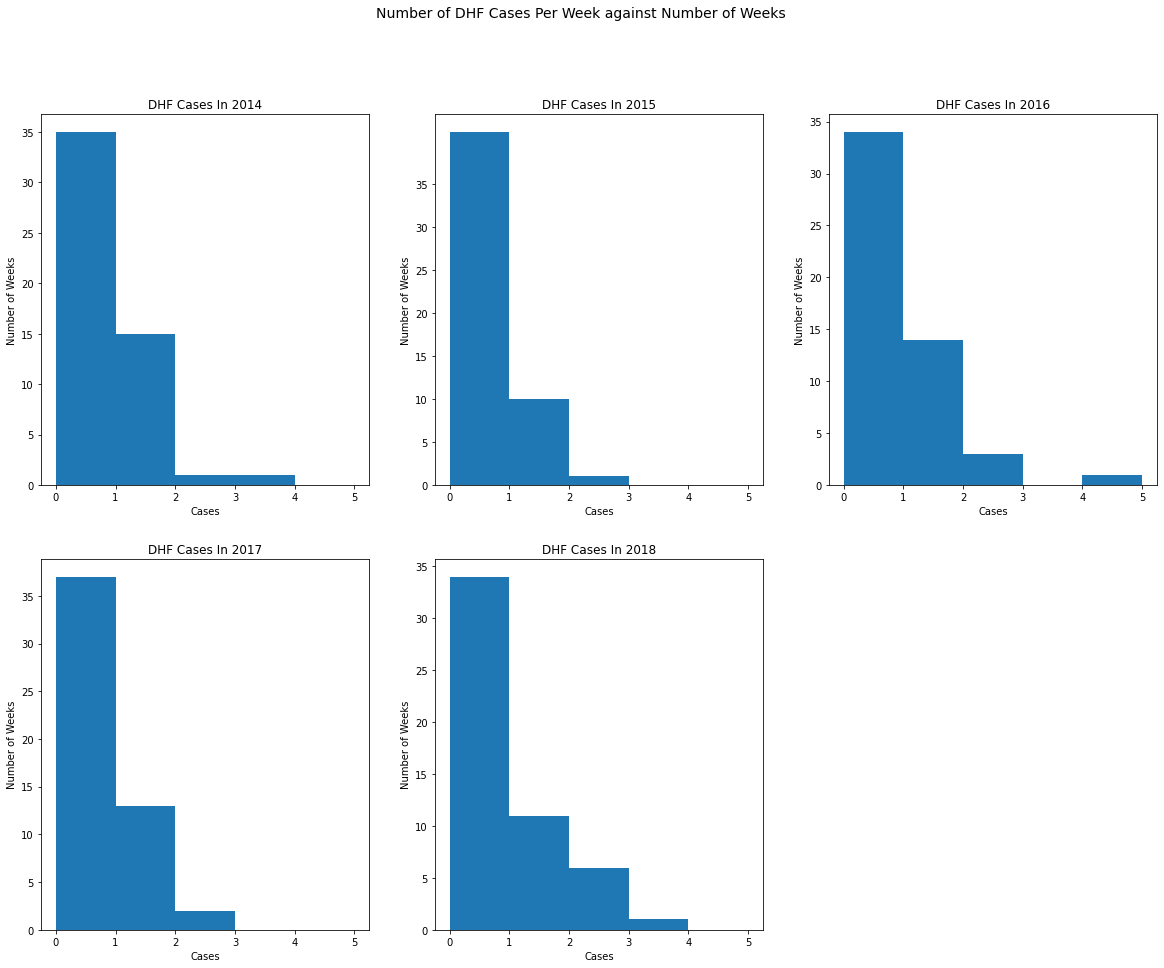

In [37]:
# histogram of dhf cases
dhf_bins = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(2, 3)
ax[0, 0].hist(dengue_grouped["2014"].cases_dhf, bins=dhf_bins)
ax[0, 0].set_xticks(dhf_bins)
ax[0, 0].yaxis.set_ticks(np.arange(0, 40, 5))
ax[0, 0].set(title="DHF Cases In 2014",
             xlabel="Cases", ylabel="Number of Weeks")

ax[0, 1].hist(dengue_grouped["2015"].cases_dhf, bins=dhf_bins)
ax[0, 1].set_xticks(dhf_bins)
ax[0, 1].yaxis.set_ticks(np.arange(0, 40, 5))
ax[0, 1].set(title="DHF Cases In 2015",
             xlabel="Cases", ylabel="Number of Weeks")

ax[0, 2].hist(dengue_grouped["2016"].cases_dhf, bins=dhf_bins)
ax[0, 2].set_xticks(dhf_bins)
ax[0, 2].yaxis.set_ticks(np.arange(0, 40, 5))
ax[0, 2].set(title="DHF Cases In 2016",
             xlabel="Cases", ylabel="Number of Weeks")


ax[1, 0].hist(dengue_grouped["2017"].cases_dhf, bins=dhf_bins)
ax[1, 0].set_xticks(dhf_bins)
ax[1, 0].yaxis.set_ticks(np.arange(0, 40, 5))
ax[1, 0].set(title="DHF Cases In 2017",
             xlabel="Cases", ylabel="Number of Weeks")

ax[1, 1].hist(dengue_grouped["2018"].cases_dhf, bins=dhf_bins)
ax[1, 1].set_xticks(dhf_bins)
ax[1, 1].yaxis.set_ticks(np.arange(0, 40, 5))
ax[1, 1].set(title="DHF Cases In 2018",
             xlabel="Cases", ylabel="Number of Weeks")

ax[-1, -1].axis('off')

fig.suptitle(
    "Number of DHF Cases Per Week against Number of Weeks", fontsize=14)

plt.savefig("./plots/dengue2.png")